In [1]:
import pandas as pd
import nltk
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('stopwords')


result = pd.read_csv('https://bit.ly/2PiepHg')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 1. Escolha uma estratégia de tokenização para a coleção que você está usando e justifique sua estratégia. É importante que você inclua decisões adicionais em relação ao que foi feito no Laboratório anterior (por exemplo, tratamento de maiúsculas/minúsculas e strings numéricas).

In [0]:
all_words = []
filtered_words = []

tknz = RegexpTokenizer(r'([A-Za-zÁáÉéÍíÓóÚúÃãÕõÇçÂâÊê]{3,27})')
stopwords = nltk.corpus.stopwords.words('portuguese')

for text in result.text:
  words = []
  for word in tknz.tokenize(text.lower()):
    if len(word) >= 3:
      words.append(word)
  all_words.extend(words)

filtered_words = []
for word in all_words:
  if word not in stopwords:
    filtered_words.append(word)

In [10]:
print("Sem filtragem:", len(all_words))
print("Com filtragem:", len(filtered_words))

Sem filtragem: 154664
Com filtragem: 116884


# 2. Refaça a questão 2 do Laboratório anterior usando os tokens produzidos.

In [0]:
total_occurrences = len(words)
word_frequency = Counter(words)

In [12]:
top_50_words = word_frequency.most_common(50)
top_50_table = pd.DataFrame(columns = ['Word', 'Frequency', 'r', 'Pr(%)', 'r.Pr'])

top_50_table['Word'] = [tp_word[0] for tp_word in top_50_words]
top_50_table['Frequency'] = [tp_word[1] for tp_word in top_50_words]
top_50_table['r'] = [rank+1 for rank in range(0, len(top_50_words))]
top_50_table['Pr(%)'] = [round((word[1] / total_occurrences)*100, 2) for word in top_50_words]
top_50_table['r.Pr'] = round((top_50_table['Pr(%)']/100)*top_50_table['r'], 3)

top_50_table.index += 1
top_50_table

,Word,Frequency,r,Pr(%),r.Pr
1,que,88,1,3.54,0.035
2,com,52,2,2.09,0.042
3,uma,45,3,1.81,0.054
4,para,39,4,1.57,0.063
5,marido,31,5,1.25,0.062
6,não,29,6,1.17,0.070
7,por,27,7,1.09,0.076
8,califado,25,8,1.00,0.080
9,como,25,9,1.00,0.090
10,seu,23,10,0.92,0.092


# 3. Aplique Stemming nos tokens produzidos e encontre 10 exemplos de falsos positivos e 10 exemplos de falsos negativos. Que impacto você acha que falsos positivos e negativos, como esses, teriam no processamento de consultas? Dê exemplos.

In [27]:
stemmed_words = []
stemmer = nltk.stem.SnowballStemmer('portuguese')
stemmed_words = []
for word in filtered_words:
  stemmed_words.append(stemmer.stem(word))
set_stem = sorted(set(stemmed_words))
set_words = sorted(set(all_words))

print("Palavras sem Stemming:",len(set_words))
print("Palavras com Stemming:",len(set_stem))

print(set_stem)
print(set_words)

Palavras sem Stemming: 22320
Palavras com Stemming: 11456
['aaa', 'aaron', 'abad', 'abaix', 'abal', 'abandon', 'abastec', 'abat', 'abcd', 'abdelkad', 'abdo', 'abdomin', 'abdulah', 'abe', 'abelh', 'aberr', 'aberson', 'abert', 'abertur', 'abestalh', 'abin', 'abism', 'abissal', 'abissamr', 'abissín', 'abjet', 'abobalh', 'abol', 'abolicion', 'abomin', 'abon', 'abord', 'abordag', 'abordagens', 'abort', 'abrac', 'abrah', 'abrams', 'abrand', 'abrang', 'abrangent', 'abrant', 'abraã', 'abre', 'abreu', 'abrig', 'abril', 'abrim', 'abrind', 'abrir', 'abriss', 'abriu', 'abrupt', 'absolut', 'absolv', 'absolviçã', 'absort', 'absorv', 'abstend', 'abstençõ', 'abstev', 'abstinent', 'abstiv', 'abstrat', 'abstraçã', 'abstraçõ', 'absurd', 'abubak', 'abund', 'abus', 'abzug', 'acab', 'academ', 'academy', 'acadêm', 'acalm', 'acalor', 'acamp', 'acapulc', 'acaric', 'acarret', 'acas', 'acat', 'accepted', 'aceit', 'aceler', 'acen', 'acend', 'acentu', 'acerc', 'acert', 'aces', 'acess', 'acessibil', 'acessív', 'ach

# 4. Refaça a questão 3 do Laboratório anterior usando os tokens stemizados. Você percebeu alguma diferença em relação aos tokens sem stemming? Se sim, quais?

In [28]:
total_occurrences = len(stemmed_words)
word_frequency = Counter(stemmed_words)

top_50_words = word_frequency.most_common(50)
top_50_table = pd.DataFrame(columns = ['Word', 'Frequency', 'r', 'Pr(%)', 'r.Pr'])

top_50_table['Word'] = [tp_word[0] for tp_word in top_50_words]
top_50_table['Frequency'] = [tp_word[1] for tp_word in top_50_words]
top_50_table['r'] = [rank+1 for rank in range(0, len(top_50_words))]
top_50_table['Pr(%)'] = [round((word[1] / total_occurrences)*100, 2) for word in top_50_words]
top_50_table['r.Pr'] = round((top_50_table['Pr(%)']/100)*top_50_table['r'], 3)

table = top_50_table.set_index('r')
top_50_table

,Word,Frequency,r,Pr(%),r.Pr
0,pod,641,1,0.55,0.006
1,anos,585,2,0.50,0.010
2,ser,537,3,0.46,0.014
3,outr,535,4,0.46,0.018
4,part,498,5,0.43,0.022
5,tod,498,6,0.43,0.026
6,president,476,7,0.41,0.029
7,país,457,8,0.39,0.031
8,govern,452,9,0.39,0.035
9,polít,434,10,0.37,0.037


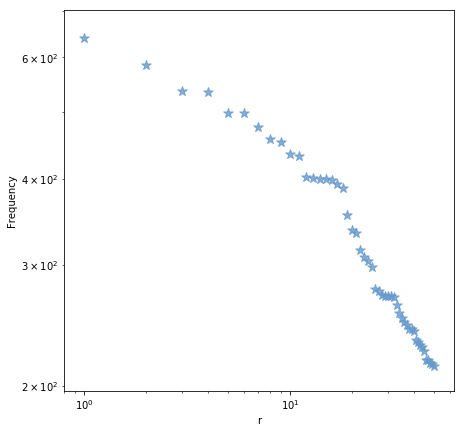

In [29]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequency", top_50_table, ax=ax, marker="*", scatter_kws={"s": 100}, fit_reg = False, color = '#6699cc')

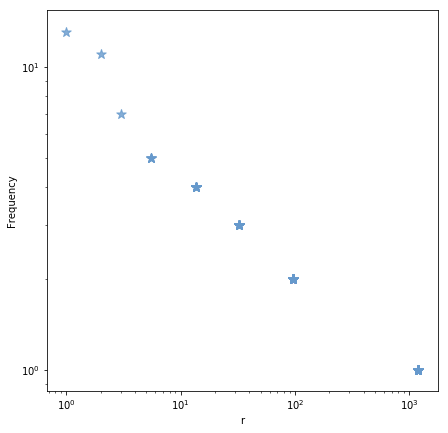

In [30]:
bigrams = []
bigrams = nltk.bigrams(words)
bigrams_freq = nltk.FreqDist(bigrams)
bigrams_table = pd.DataFrame(bigrams_freq.most_common(), columns=['word', 'Frequency'])
bigrams_table['r'] = bigrams_table['Frequency'].rank(ascending=False)

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequency", bigrams_table, ax=ax, marker="*", scatter_kws={"s": 100}, fit_reg = False, color = '#6699cc')